In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, "../")

In [3]:
from src.model.deeplabv3 import TrashDetector
from src.data.dataset import TrashDataset
from src.data.dataset2 import TrashDataset2
from torch.utils.data import DataLoader
from pytorch_lightning.loggers import TensorBoardLogger

In [4]:
from torchvision import transforms
import torch
import pytorch_lightning as pl
from pathlib import Path

In [5]:
val_size = 0.2
batch_size = 2
CONFIG = {
    "img_size": 512,
    "batch_size": batch_size,
    "val_size": val_size,
}

In [6]:
val_videos = ["0089", "0063", "0049", "0102"]

# DataLoader

In [7]:
transform = preprocess = transforms.Compose([
    transforms.ToTensor(),
    #transforms.Resize((CONFIG["img_size"], CONFIG["img_size"])),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [8]:
train_set = TrashDataset2("../data/raw/train-all.csv", "../data/raw/train-small", train=True, transform=transform, to_rotate=True)
val_set = TrashDataset2("../data/raw/train-all.csv", "../data/raw/train-small", train=False, transform=transform)

/home/renesat/0. PARA/1. Projects/Ecodrone/NN/.venv/lib/python3.9/site-packages/torch/_tensor.py:493: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


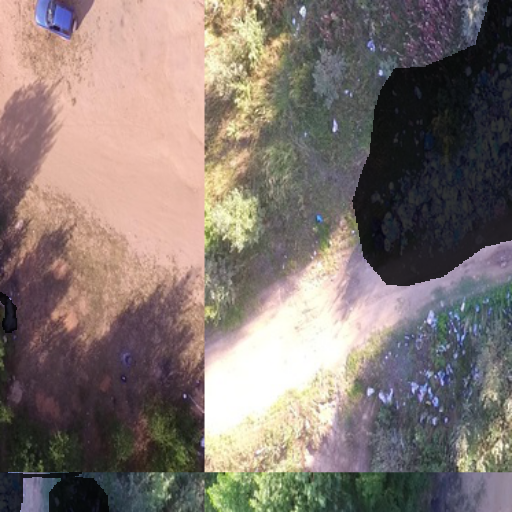

In [9]:
train_set.view_item(0)

In [10]:
len(train_set)

838

In [11]:
val_set[0]

(tensor([[[ 0.9646,  1.3755,  1.6838,  ..., -0.5938, -0.5424, -1.2103],
          [ 0.2624,  1.3242,  1.7694,  ..., -0.7308, -0.4739, -1.1589],
          [ 1.1187,  1.7523,  1.4783,  ..., -0.9363, -1.1418, -1.2788],
          ...,
          [-0.4568, -0.5082, -0.5082,  ..., -1.0048, -1.0562, -1.1418],
          [-0.4739, -0.5082, -0.5253,  ..., -1.0904, -0.9534, -0.9705],
          [-0.4911, -0.5424, -0.5253,  ..., -1.0219, -1.1760, -0.8849]],
 
         [[ 1.1155,  1.5532,  1.9209,  ...,  0.0476,  0.0826, -0.6001],
          [ 0.4153,  1.5182,  2.0084,  ..., -0.0749,  0.1527, -0.5476],
          [ 1.2906,  1.9559,  1.7458,  ..., -0.2850, -0.4951, -0.6527],
          ...,
          [ 0.2402,  0.2402,  0.2402,  ..., -0.7052, -0.7752, -0.8627],
          [ 0.2227,  0.2402,  0.2227,  ..., -0.8452, -0.6702, -0.6877],
          [ 0.2052,  0.2052,  0.2227,  ..., -0.7752, -0.8978, -0.6001]],
 
         [[ 0.4265,  0.7228,  0.8448,  ..., -0.3230, -0.2358, -0.9156],
          [-0.3578,  0.6356,

In [13]:
train_dataloader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=8)
val_dataloader = DataLoader(val_set, batch_size=batch_size, shuffle=False, num_workers=8)

# Model

In [14]:
model = TrashDetector()

In [15]:
logger = TensorBoardLogger("../logs", name="DeepLabV3")
trainer = pl.Trainer(logger=logger)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


In [16]:
trainer.fit(model, train_dataloader, val_dataloader)


  | Name  | Type      | Params
------------------------------------
0 | model | DeepLabV3 | 11.0 M
------------------------------------
11.0 M    Trainable params
0         Non-trainable params
11.0 M    Total params
44.081    Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

mIoU = 0.012976600788533688
mDSC = 0.025590332224965096


Training: -1it [00:00, ?it/s]

/home/renesat/0. PARA/1. Projects/Ecodrone/NN/.venv/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1051: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")
